In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [3]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_data.drop("Id", axis=1, inplace=True)
test_data.drop("Id", axis=1, inplace=True)

In [7]:
train_data.shape, test_data.shape

((1460, 80), (1459, 79))

In [27]:
categorical = train_data.select_dtypes(["object"]).columns

In [28]:
numerical = train_data.select_dtypes(["float64", "int64"]).columns

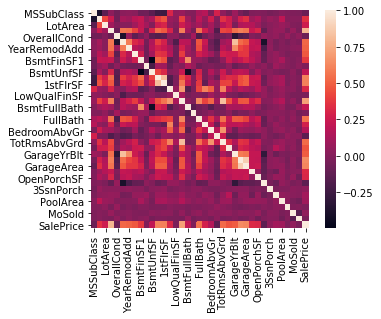

In [16]:
corr = train_data.corr()

sns.heatmap(corr, square=True)

In [25]:
indx = corr.nlargest(10, "SalePrice")["SalePrice"].index

In [26]:
indx

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [34]:
corr1 = train_data[numerical][indx].corr()

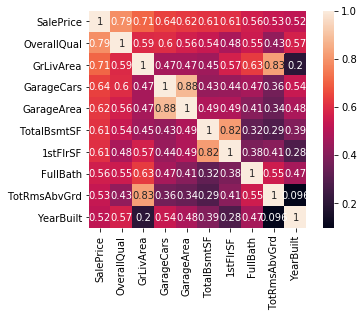

In [38]:
sns.heatmap(corr1, annot=True, square=True)
plt.show()

In [41]:
indx = indx[1:]

In [42]:
indx

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [44]:
feature = "OverallQual"
df = pd.concat([train_data["SalePrice"], train_data[feature]], axis=1)

In [45]:
df.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


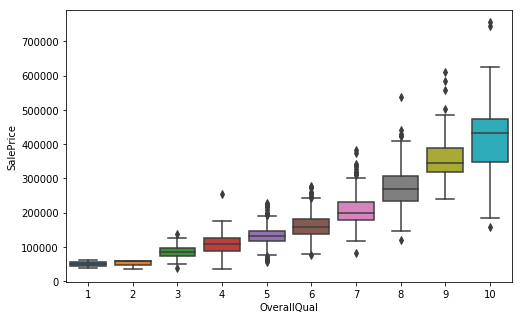

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="OverallQual", y= "SalePrice")
plt.show()

In [54]:
train_data["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

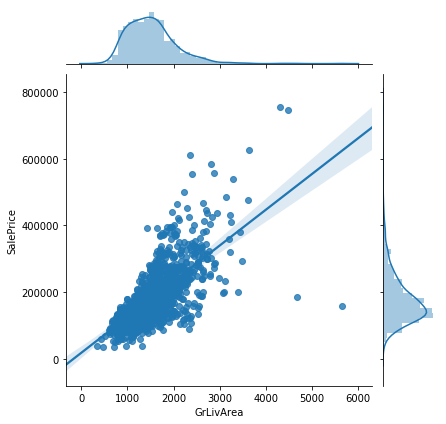

In [60]:
sns.jointplot(x=train_data["GrLivArea"], y=train_data["SalePrice"], kind="reg")
plt.show()

In [65]:
ix = train_data[(train_data["GrLivArea"] > 4300) & (train_data["SalePrice"] < 220000)].index

In [66]:
ix

Int64Index([523, 1298], dtype='int64')

In [67]:
train_data = train_data.drop(ix)

In [71]:
train_data = train_data.reset_index(drop=True)

c:\users\bobstone\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


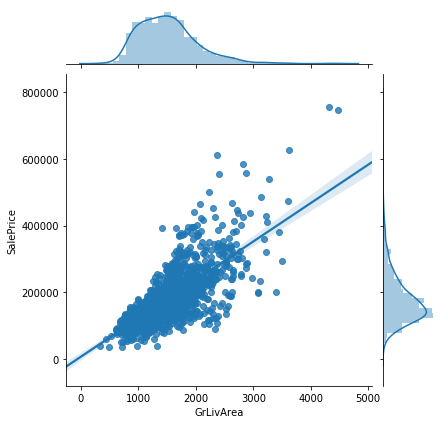

In [74]:
sns.jointplot(x=train_data["GrLivArea"], y=train_data["SalePrice"], kind="reg")
plt.show()

In [75]:
train_data["GarageCars"].describe()

count    1458.000000
mean        1.766118
std         0.747104
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [76]:
train_data["GarageCars"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

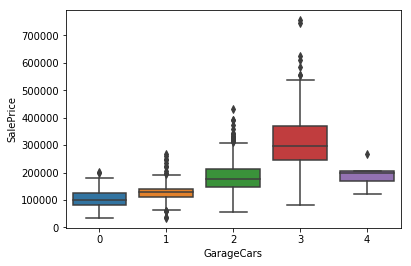

In [78]:
sns.boxplot(x=train_data["GarageCars"], y= train_data["SalePrice"])
plt.show()

In [79]:
ix = train_data[(train_data["GarageCars"] > 3) & (train_data["SalePrice"] < 300000)].index

In [80]:
ix

Int64Index([420, 746, 1189, 1338, 1348], dtype='int64')

In [81]:
train_data = train_data.drop(ix).reset_index(drop=True)

In [82]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


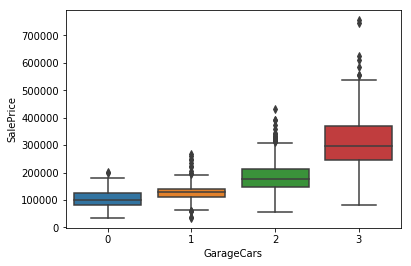

In [83]:
sns.boxplot(x=train_data["GarageCars"], y= train_data["SalePrice"])
plt.show()

In [86]:
train_data.isnull().head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


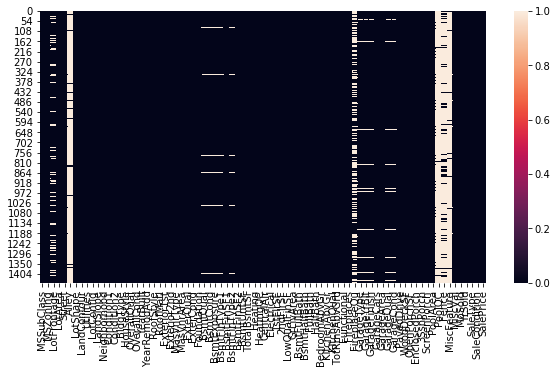

In [92]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data.isnull(), xticklabels=train_data.columns)
plt.show()

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 80 columns):
MSSubClass       1453 non-null int64
MSZoning         1453 non-null object
LotFrontage      1195 non-null float64
LotArea          1453 non-null int64
Street           1453 non-null object
Alley            90 non-null object
LotShape         1453 non-null object
LandContour      1453 non-null object
Utilities        1453 non-null object
LotConfig        1453 non-null object
LandSlope        1453 non-null object
Neighborhood     1453 non-null object
Condition1       1453 non-null object
Condition2       1453 non-null object
BldgType         1453 non-null object
HouseStyle       1453 non-null object
OverallQual      1453 non-null int64
OverallCond      1453 non-null int64
YearBuilt        1453 non-null int64
YearRemodAdd     1453 non-null int64
RoofStyle        1453 non-null object
RoofMatl         1453 non-null object
Exterior1st      1453 non-null object
Exterior2nd      1453 non-

In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non